In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Fatoni
Rendy
Satria

# Cleaning data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tonimurfid/Statistika_24/main/climate_data.csv')
df.head(5)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [3]:
print(df.isna().sum())
print(df.duplicated().sum())

df = df.dropna()
df = df.drop_duplicates()

print(df.isna().sum())
print(df.duplicated().sum())

date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64
0
date          0
Tn            0
Tx            0
Tavg          0
RH_avg        0
RR            0
ss            0
ff_x          0
ddd_x         0
ff_avg        0
ddd_car       0
station_id    0
dtype: int64
0


In [4]:
df = df.drop(['Tn','Tx','RH_avg','RR','ss','ff_x','ff_avg','ddd_car','ddd_x','station_id'],axis=1)
df.head(5)

,date,Tavg
0,01-01-2010,27.1
1,02-01-2010,25.7
2,03-01-2010,24.5
3,04-01-2010,25.8
7,08-01-2010,26.8


In [5]:
df['date'] = df['date'].apply(lambda x: x.split("-")[2])
df

,date,Tavg
0,2010,27.1
1,2010,25.7
2,2010,24.5
3,2010,25.8
7,2010,26.8
...,...,...
589258,2020,28.2
589259,2020,27.6
589260,2020,29.2
589263,2020,28.4


In [6]:
df['date'] = df['date'].astype(int)
df = df.drop(df[df['date']==2020].index)
df

,date,Tavg
0,2010,27.1
1,2010,25.7
2,2010,24.5
3,2010,25.8
7,2010,26.8
...,...,...
588919,2019,29.1
588920,2019,29.3
588923,2019,28.7
588924,2019,28.3


In [7]:
df.reset_index(drop=True, inplace=True)
df

,date,Tavg
0,2010,27.1
1,2010,25.7
2,2010,24.5
3,2010,25.8
4,2010,26.8
...,...,...
337633,2019,29.1
337634,2019,29.3
337635,2019,28.7
337636,2019,28.3


In [8]:
# df.to_csv('climate_dataset_cleaned.csv', index=False)

## Function

In [9]:
def mean(dataframe, kolom):
    return  dataframe[kolom].mean()

def median(dataframe, kolom):
    return dataframe[kolom].median()

def modus(data, kolom):
    modus = data[kolom].value_counts().head(1)
    return modus.index[0]

def kuartil(dataframe, kolom):
    return dataframe[kolom].quantile([0.25,0.5,0.75])

def desil(dataframe, kolom):
    desil = dataframe[kolom].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    return desil

def range_data(dataframe, kolom):
    range_data = dataframe[kolom].max() - dataframe[kolom].min()
    return range_data

def hitung_mean_deviasi(dataframe, kolom):
    rata_rata = dataframe[kolom].mean()
    selisih_absolut = dataframe[kolom].sub(rata_rata).abs()
    mean_deviasi = selisih_absolut.mean()
    return mean_deviasi

def hitung_standard_deviasi(dataframe, kolom):
    standard_deviation = dataframe[kolom].std()
    return standard_deviation


# Pengurutan

In [10]:
df = df.sort_values(by=['date', 'Tavg'])
df.reset_index(drop=True, inplace=True)
df

,date,Tavg
0,2010,17.2
1,2010,17.2
2,2010,17.4
3,2010,17.5
4,2010,17.5
...,...,...
337633,2019,32.3
337634,2019,32.4
337635,2019,32.8
337636,2019,34.1


# Data Tunggal

## Mean

In [11]:
def mean(dataframe, kolom):
    total = 0
    for value in dataframe[kolom]:
        total += value
    rata = total/len(dataframe[kolom])
    return rata

print(f"Mean data Tavg : {mean(df,'Tavg'):.2f}")

Mean data Tavg : 26.81


## Median

In [12]:
def median(dataframe, kolom):
    sorted_data = sorted(dataframe[kolom])
    median_index = len(sorted_data) // 2
    
    if len(sorted_data) % 2 == 0:
        return (sorted_data[median_index - 1] + sorted_data[median_index]) / 2
    else:
        return sorted_data[median_index]


print(f"Median data Tavg : {median(df,'Tavg'):.2f}")

Median data Tavg : 27.10


## Modus data

In [13]:
def modus(data, kolom):
    modus = data[kolom].value_counts().head(1)
    return modus.index[0]

print(f"Modus data Tavg : {modus(df,'Tavg'):.2f}")

Modus data Tavg : 27.20


## Kuartil

In [14]:
def kuartil(dataframe, kolom):
    return dataframe[kolom].quantile([0.25,0.5,0.75])

print("Data kuartil :")
kuartil_df = pd.DataFrame()
kuartil_values = kuartil(df, 'Tavg')
kuartil_df['Tavg'] = kuartil_values

kuartil_df

Data kuartil :


,Tavg
0.25,26.1
0.50,27.1
0.75,27.9


## Desil

In [15]:
def desil(dataframe, kolom):
    desil = dataframe[kolom].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    return desil

print("Data Desil :")
desil_df = pd.DataFrame()
desil_values = desil(df, 'Tavg')
desil_df['Tavg'] = desil_values
desil_df

Data Desil :


,Tavg
0.1,24.7
0.2,25.8
0.3,26.4
0.4,26.8
0.5,27.1
0.6,27.4
0.7,27.8
0.8,28.2
0.9,28.7


## Range

In [16]:
def range_data(dataframe, kolom):
    range_data = dataframe[kolom].max() - dataframe[kolom].min()
    return range_data

print(f"Range Tavg : {range_data(df,'Tavg'):.2f}")

Range Tavg : 21.60


## Rata-rata deviasi

In [17]:
def hitung_mean_deviasi(dataframe, kolom):
    rata_rata = dataframe[kolom].mean()
    selisih_absolut = dataframe[kolom].sub(rata_rata).abs()
    mean_deviasi = selisih_absolut.mean()
    return mean_deviasi

print(f"Rata-rata Deviasi Tavg : {hitung_mean_deviasi(df,'Tavg'):.2f}")

Rata-rata Deviasi Tavg : 1.32


In [18]:
def hitung_standard_deviasi(dataframe, kolom):
    standard_deviation = dataframe[kolom].std()
    return standard_deviation

print(f"Standar Deviasi Tavg : {hitung_standard_deviasi(df,'Tavg'):.2f}")

Standar Deviasi Tavg : 1.87


# Data Kelompok

In [19]:
# Membuat rentang tahun secara manual
tahun = [f"{year}-{year+1}" for year in range(2010, 2020, 2)]

## Mean

In [20]:
# Mengelompokkan DataFrame berdasarkan rentang tahun dan menghitung nilai rata-rata
mean_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).mean()
mean_df = mean_df.round(2)
mean_df.drop(columns=['date'], inplace=True)
print("Data Mean:")
mean_df

Data Mean:


C:\Users\Fatoni Murfid S\AppData\Local\Temp\ipykernel_21400\592676432.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).mean()


,Tavg
date,
2010-2011,26.68
2012-2013,26.67
2014-2015,26.87
2016-2017,26.98
2018-2019,26.91


## Median

In [21]:
# Mengelompokkan DataFrame berdasarkan rentang tahun dan menghitung nilai rata-rata
median_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).median()
median_df = median_df.round(2)
median_df.drop(columns=['date'], inplace=True)
print("Data Median:")
median_df

Data Median:


C:\Users\Fatoni Murfid S\AppData\Local\Temp\ipykernel_21400\124574781.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).median()


,Tavg
date,
2010-2011,27.0
2012-2013,27.0
2014-2015,27.2
2016-2017,27.3
2018-2019,27.2


## Modus

In [22]:
def modus(data, kolom):
    modus = data[kolom].value_counts().head(1)
    return modus.index[0]

modus_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).apply(lambda x: modus(x, 'Tavg'))

modus_df = modus_df.reset_index()
modus_df = modus_df.rename(columns={0: 'Tavg'})
modus_df

C:\Users\Fatoni Murfid S\AppData\Local\Temp\ipykernel_21400\1122481773.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  modus_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).apply(lambda x: modus(x, 'Tavg'))


,date,Tavg
0,2010-2011,27.1
1,2012-2013,27.2
2,2014-2015,27.2
3,2016-2017,27.5
4,2018-2019,27.3


## Kuartil

In [23]:
# Mengelompokkan DataFrame berdasarkan rentang tahun dan menghitung kuartil 1, 2, dan 3
result_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).agg({
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.5),
    lambda x: x.quantile(0.75)
})

result_df = result_df.round(2)
result_df.drop(columns=['date'], inplace=True)

result_df = result_df.rename(columns={
    '<lambda_0>': 'Q1',
    '<lambda_1>': 'Q2',
    '<lambda_2>': 'Q3'
})

print("Data Kuartil:")
result_df

Data Kuartil:


C:\Users\Fatoni Murfid S\AppData\Local\Temp\ipykernel_21400\2768110616.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).agg({


Tavg            
             Q1    Q2    Q3
date                       
2010-2011  26.0  27.8  27.0
2012-2013  26.0  27.8  27.0
2014-2015  26.2  28.0  27.2
2016-2017  26.3  28.1  27.3
2018-2019  26.2  28.0  27.2

## Desil

In [24]:
# Mengelompokkan DataFrame berdasarkan rentang tahun dan menghitung desil 1 hingga 9
result_df_desil = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).agg({
    lambda x: x.quantile(0.1),
    lambda x: x.quantile(0.2),
    lambda x: x.quantile(0.3),
    lambda x: x.quantile(0.4),
    lambda x: x.quantile(0.5),
    lambda x: x.quantile(0.6),
    lambda x: x.quantile(0.7),
    lambda x: x.quantile(0.8),
    lambda x: x.quantile(0.9)
})

result_df_desil = result_df_desil.round(2)

# Menghapus kolom date yang tidak diperlukan
result_df_desil.drop(columns=['date'], inplace=True)

# Rename kolom menggunakan dictionary
result_df_desil = result_df_desil.rename(columns={
    '<lambda_0>': 'D1',
    '<lambda_1>': 'D2',
    '<lambda_2>': 'D3',
    '<lambda_3>': 'D4',
    '<lambda_4>': 'D5',
    '<lambda_5>': 'D6',
    '<lambda_6>': 'D7',
    '<lambda_7>': 'D8',
    '<lambda_8>': 'D9'
})

# Menampilkan hasil
print("Data Desil:")
result_df_desil


C:\Users\Fatoni Murfid S\AppData\Local\Temp\ipykernel_21400\2093191468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_df_desil = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).agg({


Data Desil:


Tavg                                                
             D1    D2    D3    D4    D5    D6    D7    D8    D9
date                                                           
2010-2011  28.6  24.5  27.3  26.3  25.7  27.6  26.6  28.0  27.0
2012-2013  28.6  24.4  27.3  26.3  25.7  27.7  26.7  28.0  27.0
2014-2015  28.8  24.9  27.5  26.4  25.9  27.8  26.8  28.2  27.2
2016-2017  28.8  25.1  27.6  26.5  26.0  27.9  26.9  28.3  27.3
2018-2019  28.8  24.9  27.5  26.4  25.9  27.8  26.8  28.3  27.2

## Range

In [25]:
def range_data(dataframe, kolom):
    range_data = dataframe[kolom].max() - dataframe[kolom].min()
    return range_data

range_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).apply(lambda x: range_data(x, 'Tavg'))

range_df = range_df.reset_index()
range_df = range_df.round(2)
range_df = range_df.rename(columns={0: 'Tavg'})
range_df


C:\Users\Fatoni Murfid S\AppData\Local\Temp\ipykernel_21400\3045448600.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).apply(lambda x: range_data(x, 'Tavg'))


,date,Tavg
0,2010-2011,17.9
1,2012-2013,20.2
2,2014-2015,21.6
3,2016-2017,16.7
4,2018-2019,18.5


## Rata-rata Deviasi

In [26]:
def hitung_mean_deviasi(dataframe, kolom):
    rata_rata = dataframe[kolom].mean()
    selisih_absolut = dataframe[kolom].sub(rata_rata).abs()
    mean_deviasi = selisih_absolut.mean()
    return mean_deviasi

mean_dev_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).apply(lambda x: hitung_mean_deviasi(x, 'Tavg'))

mean_dev_df = mean_dev_df.reset_index()
mean_dev_df = mean_dev_df.round(2)
mean_dev_df = mean_dev_df.rename(columns={0: 'Tavg'})
mean_dev_df


C:\Users\Fatoni Murfid S\AppData\Local\Temp\ipykernel_21400\1267706353.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_dev_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).apply(lambda x: hitung_mean_deviasi(x, 'Tavg'))


,date,Tavg
0,2010-2011,1.31
1,2012-2013,1.35
2,2014-2015,1.34
3,2016-2017,1.28
4,2018-2019,1.32


## Standar Deviasi

In [27]:
def hitung_standard_deviasi(dataframe, kolom):
    standard_deviation = dataframe[kolom].std()
    return standard_deviation

std_dev_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).apply(lambda x: hitung_standard_deviasi(x, 'Tavg'))

std_dev_df = std_dev_df.reset_index()
std_dev_df = std_dev_df.round(2)
std_dev_df = std_dev_df.rename(columns={0: 'Tavg'})
std_dev_df


C:\Users\Fatoni Murfid S\AppData\Local\Temp\ipykernel_21400\783471832.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_dev_df = df.groupby(pd.cut(df['date'], bins=range(2010, 2022, 2), right=False, labels=tahun)).apply(lambda x: hitung_standard_deviasi(x, 'Tavg'))


,date,Tavg
0,2010-2011,1.82
1,2012-2013,1.92
2,2014-2015,1.94
3,2016-2017,1.83
4,2018-2019,1.86


# Diagram

## Batang

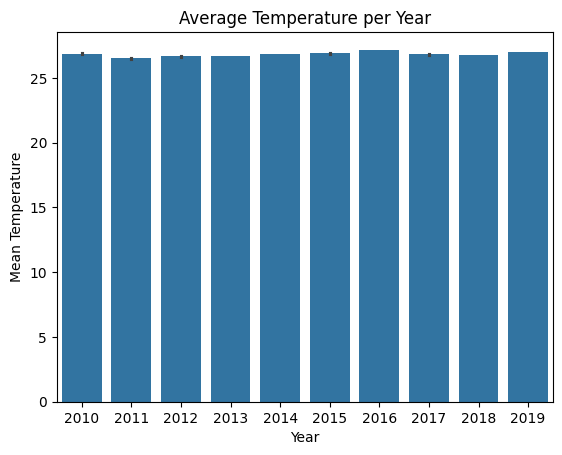

In [28]:
sns.barplot(x='date', y='Tavg', data=df)
plt.title('Average Temperature per Year')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.show()


## Garis

## Pie